<a href="https://colab.research.google.com/github/fvicencioh/FEM/blob/main/Tarea_3_FEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desarrollo Tarea N°3: Método de Elementos Finitos

## Pregunta 1

Determinar los desplazamientos nodales, los esfuerzos axiales de las barras y las fuerzas de reacción para la armadura mostrada en la siguiente figura.

### Determinación de desplazamientos

Primero, se determinan los desplazamientos en los nodos 2 y 3 (u2, v2 y u3) utilizando el principio de mínima acción. Se despeja los desplazamientos del sistema resultante al igualar la primera variación a 0.

In [ ]:
import numpy as np

# Longitudes en [m]

l1 = 0.4 # Longitud de la barra 1.
l2 = 0.3 # Longitud de la barra 2.
l3 = 0.5 # Longitud de la barra 3.

# Angulos en radianes

o1 = 0 # Angulo respecto del eje x de la barra 1.
o2 = np.pi/2 # Angulo respecto del eje x de la barra 2.
o3 = (0.2952 + 0.5)*np.pi # Angulo respecto del eje x de la barra 3 (53.13° + 90°)

# Constantes físicas

E = 200 * (10**9)
A = 0.001 # Área en m2

# Definición de Fuerzas en N

F1 = 500 # Fuerza sobre el nodo 2
F2 = 200 # Fuerza sobre el nodo 3

F1_o = -np.pi/6 # Ángulo de aplicación de F1, signo menos por la orientación
F2_o = np.pi # Ángulo de aplicación de F2, 180° por el sentido.

# Definición de la rigidez por elemento.

k1 = E*A/l1
k2 = E*A/l2
k3 = E*A/l3

# Definición de matriz global de rigidez

K = np.zeros((3,3))
K[0,0] = k1
K[1,1] = k2
K[2,2] = 16*k3/25

# Vector de fuerzas externas

B = np.zeros(3)
B[0] = F1*np.cos(F1_o)
B[1] = F1*np.sin(F1_o)
B[2] = F2*np.cos(F2_o)

# Resolución de sistema lineal

u = np.linalg.solve(K,B)

u2,v2,u3 = u

print("El valor de los desplazamientos es:")
print(f"u2 = {u2*1000:.6f} [mm]")
print(f"v2 = {v2*1000:.6f} [mm]")
print(f"u3 = {u3*1000:.6f} [mm]")

El valor de los desplazamientos es:
u2 = 0.000866 [mm]
v2 = -0.000375 [mm]
u3 = -0.000781 [mm]


### Cálculo de esfuerzos axiales

Una vez obtenidos los desplazamientos, es posible calcular el largo final de cada barra, su deformación unitaria y, finalmente, su esfuerzo axial.

In [ ]:
e1 = u2/l1
e2 = v2/l2
e3 = (4/5)*u3/l3

sigma1 = e1*E/1000
sigma2 = e2*E/1000
sigma3 = e3*E/1000
print("El valor de la deformación unitaria es:")
print(f"Esfuerzo axial barra 1 = {e1:.9f} [-]")
print(f"Esfuerzo axial barra 2 = {e2:.9f} [-]")
print(f"Esfuerzo axial barra 3 = {e3:.9f} [-]")
print()
print("El valor de los esfuerzos es:")
print(f"Esfuerzo axial barra 1 = {sigma1:.3f} [kN/m2]")
print(f"Esfuerzo axial barra 2 = {sigma2:.3f} [kN/m2]")
print(f"Esfuerzo axial barra 3 = {sigma3:.3f} [kN/m2]")

El valor de la deformación unitaria es:
Esfuerzo axial barra 1 = 0.000002165 [-]
Esfuerzo axial barra 2 = -0.000001250 [-]
Esfuerzo axial barra 3 = -0.000001250 [-]

El valor de los esfuerzos es:
Esfuerzo axial barra 1 = 433.013 [kN/m2]
Esfuerzo axial barra 2 = -250.000 [kN/m2]
Esfuerzo axial barra 3 = -250.000 [kN/m2]


### Cálculo de las fuerzas de reacción en los apoyos

In [ ]:
fa_1 = sigma1*A*1000
fa_2 = sigma2*A*1000
fa_3 = sigma3*A*1000

print("El valor de las fuerzas internas es:")
print(f"Fuerza interna barra 1 = {fa_1:.3f} [N]")
print(f"Fuerza interna barra 2 = {fa_2:.3f} [N]")
print(f"Fuerza interna barra 3 = {fa_3:.3f} [N]")

R1y = fa_3*(3/5) # sin a = 3/5
R1x = -fa_3*(4/5) - fa_1 # cos a = 4/5
R3y = -(fa_2 + fa_3*(3/5))

print()
print("El valor de las reacciones es:")
print(f"Reacción R1y = {R1y:.3f} [N]")
print(f"Reacción R1x = {R1x:.3f} [N]")
print(f"Reacción R3y = {R3y:.3f} [N]")

El valor de las fuerzas internas es:
Fuerza interna barra 1 = 433.013 [N]
Fuerza interna barra 2 = -250.000 [N]
Fuerza interna barra 3 = -250.000 [N]

El valor de las reacciones es:
Reacción R1y = -150.000 [N]
Reacción R1x = -233.013 [N]
Reacción R3y = 400.000 [N]


## Pregunta 2

In [1]:
import numpy as np
from scipy.sparse.linalg import gmres
import matplotlib.pyplot as plt

def distributed_force(x):
  kind = 'C'
  f = np.ones(len(x))
  if len(x)%2 == 1:
    middle = int(len(x)/2 + .5)
  else:
    raise ValueError("Se debe utilizar un número par de elementos")
  f[middle:] = 0
  return -1000*f, kind

class element:
  def __init__(self,h,n,forces,kind):

    self.EI = 20*10**7 # Rigidez a la flexión del elemento

    #----------Numeración global del elemento----------#

    self.i_global = 2*n-1 # Nodo izquierdo
    self.j_global = 2*n   # Nodo derecho

    #----------Matriz de rigidez del elemento----------#

    self.K_00 = np.array(([12/h**3, 6/h**2],[6/h**2, 4/h]))
    self.K_01 = np.array(([-12/h**3, 6/h**2],[-6/h**2, 2/h]))
    self.K_10 = np.array(([-12/h**3, -6/h**2],[6/h**2, 2/h]))
    self.K_11 = np.array(([12/h**3, -6/h**2],[-6/h**2, 4/h]))
    self.k_element = np.block([[self.K_00,self.K_01],[self.K_10,self.K_11]])*self.EI

    #----------Vector de carga distribuida del elemento----------#

    self.wi = forces[0]
    self.wj = forces[1]

    if kind=='C' and self.wi!=self.wj: # Trato de discontinuidad para distribución constante, evita cargas en elementos no cargados.
      min_q = min([abs(self.wi),abs(self.wj)])
      self.wi = min_q
      self.wj = min_q

    self.fw_element = np.zeros(4)
    self.fw_element[0] = h*(7*self.wi/20 + 3*self.wj/20)
    self.fw_element[1] = h**2 * (self.wi/20 + self.wj/30)
    self.fw_element[2] = h*(3*self.wi/20 + 7*self.wj/20)
    self.fw_element[3] = -h**2 * (self.wi/30 + self.wj/20)

class viga:
  def __init__(self,L,N,force):
    #----------Constantes físicas----------#

    self.EI = 20 * 10**7
    self.k_r = self.EI * 10**(-4)

    #----------Discretización y determinación de nodos----------#
    self.length = L
    self.nodes = N+1
    self.h = L/N
    self.x = np.linspace(0,L,self.nodes)

    #----------Determinar la carga distribuida en el espacio discretizado----------#

    self.q, self.q_kind = force(self.x)

    #----------Creación de los elementos----------#

    self.elements = {}
    self.K = np.zeros((2*self.nodes,2*self.nodes))
    self.fw = np.zeros(2*self.nodes)

    for i in range(N):
      element_number = i+1
      self.elements[element_number] = element(self.h,element_number,self.q[i:i+2],self.q_kind)
      dummy = np.zeros((2*self.nodes,2*self.nodes))
      dummy[2*i:2*i+4,2*i:2*i+4] = self.elements[element_number].k_element
      self.K+=dummy # Ensamblaje matriz global de rigidez
      dummy_2 = np.zeros(2*self.nodes)
      dummy_2[2*i:2*i+4] = self.elements[element_number].fw_element
      self.fw+=dummy_2 # Ensamblaje vector global de trabajo
    self.K[2*self.nodes-2,2*self.nodes-2]+=self.k_r

  def solve_system(self, external_conditions, boundary_conditions, solver='NumPy'):
    '''
    external_conditions = Diccionario de la forma i:[x,F,'F']
                          donde i es un correlativo, x es la posición
                          F es la magnitud de la fuerza o momento y
                          'F' indica si es fuerza o momento.
    boundary_conditions = Diccionario de la forma i:[x,'A']
                          donde i es un correlativo, x es la posición
                          de la condición, si no coincide exactamente
                          con un nodo devuelve un error. 'A' es el tipo
                          de condición, 'A' para apoyo y 'F' para fijo
                          o empotramiento. Las condiciones deben estar
                          ordenadas por distancia.
    '''
    #----------Creación de vector de fuerzas externas----------#

    ndof = len(self.fw) # Grados de libertad del sistema general (completo)
    self.ec = external_conditions
    self.external_forces = np.zeros(ndof)

    for i in external_conditions:
      position, magnitude, kind = external_conditions[i]
      relative_node = int(np.round(position/self.h,0))
      if (position%self.h > 1e-9) and (abs(position%self.h - self.h) > 1e-9):
        print(f"La fuerza o momento externo {i} se encuentra fuera de un nodo, se aproximara al nodo {relative_node}.")
      if kind=='F':
        dof = 2 * relative_node
      elif kind=='M':
        dof = 2 * relative_node + 1
      else:
        raise ValueError(f'No se reconoce el tipo de condición de borde: {kind}')
      self.external_forces[dof]+= magnitude
    self.forces_vector = self.fw + self.external_forces # Vector de fuerzas completo (carga distribuida y fuerzas externas).

    self.K_particular = np.copy(self.K)
    self.forces_particular = np.copy(self.forces_vector)

    #----------Aplicación de condiciones de borde----------#
    self.bc = boundary_conditions
    self.K_particular = np.copy(self.K) # Matriz reducida (particular), al aplicar las condiciones de borde.
    self.forces_particular = np.copy(self.forces_vector) # Vector reducido al aplicar las condiciones de borde

    eliminated_rows = []
    for i in boundary_conditions:
      position, kind = boundary_conditions[i]
      if (position%self.h > 1e-9) and (abs(position%self.h - self.h) > 1e-9):
        raise ValueError(f"La condición de borde {i} no se encuentra en un nodo, considera una cantidad distinta de nodos")
      relative_node = int(np.round(position/self.h,0))
      eliminated_rows.append(2*relative_node)
      if kind=='F':
        eliminated_rows.append(2*relative_node + 1)
      elif kind not in ['F', 'A']:
        raise ValueError(f'No se reconoce la condición de contorno {kind}, utilice F para empotramiento y A para apoyo')

    eliminated_rows = sorted(set(eliminated_rows))

    dummy = np.ones(ndof, dtype=bool) # Vector de Trues
    dummy[eliminated_rows] = False # Las posiciones a eliminar toman el valor False

    self.K_particular = self.K[np.ix_(dummy, dummy)]
    self.forces_particular = self.forces_vector[dummy] # Se extraen solo las posiciones no eliminadas de cada arreglo

    #----------Resolución de Sistema Lineal----------#

    self.solution_vector = np.zeros(len(self.forces_particular))
    if solver=='GMRES':
      self.solution_vector, info= gmres(self.K_particular, self.forces_particular, maxiter=5000, restart=200, rtol=1e-5)
      if info>0:
        print('GMRES no alcanzo la convergencia, revisar el número de elementos')
    elif solver=='NumPy':
      self.solution_vector = np.linalg.solve(self.K_particular, self.forces_particular)

    else:
      raise ValueError(f'No se reconoce solver {solver}.')

    #----------Reconstrucción solución completa----------#

    temp = np.zeros(ndof)
    dummy = np.ones(ndof, dtype=bool)
    dummy[eliminated_rows] = False
    temp[dummy] = self.solution_vector
    self.solution_vector = temp

    self.displacements = self.solution_vector[::2]
    self.angles = self.solution_vector[1::2]

    #----------Cálculo de reacciones----------#

    self.reactions = np.matmul(self.K,self.solution_vector)-self.forces_vector
    self.reactions_forces = self.reactions[::2]
    self.reactions_moments = self.reactions[1::2]
    self.spring_force = -self.displacements[-1]*self.k_r

  def show_deformation(self):

    fig, ax = plt.subplots()
    ax.plot(self.x, self.displacements*1000, label ='Configuración deformada', linestyle="--", color='blue')
    ax.plot(self.x, np.zeros(self.nodes), label='Configuración Inicial', linestyle="-", color='orange')
    ax.set_xlabel('x [m]')
    ax.set_ylabel('v [mm]')
    ax.set_title('Curva Elástica')
    plt.grid(True)
    ax.legend()

  def show_shear_diagram(self, analytical=False):
    self.v_third_derivate()
    self.shear = self.dv3*self.EI
    fig, ax = plt.subplots()
    ax.step(self.x, self.shear, where='post', label ='Aproximación discreta', linestyle="-", color='red')
    if analytical:
      x_plot = np.linspace(0,self.length,1001)
      self.shear_analytical = np.zeros(len(x_plot)+1)
      for i in range(len(x_plot)):
        if x_plot[i]<5:
          self.shear_analytical[i] = -973.63 - 1000*x_plot[i]
        if x_plot[i]==5:
          self.shear_analytical[i] = -973.63 - 5000
          self.shear_analytical[i+1] = -973.63 - 5000 + 8456.05
          x_plot = np.append(x_plot, x_plot[i])
        if x_plot[i]>5:
          self.shear_analytical[i+1] = 2500 - 17.58
      ax.plot(np.sort(x_plot), self.shear_analytical, label ='Analítica', linestyle="--", color='blue')
    ax.plot(self.x, np.zeros(len(self.x)), linestyle='-', color='black')
    ax.set_xlabel('x [m]')
    ax.set_ylabel('V [N]')
    ax.set_title('Diagrama de fuerza cortante')
    plt.grid(True)
    ax.legend()

  def show_moment_diagram(self, analytical=False):
    self.v_second_derivate()
    self.moment = self.dv2*self.EI
    fig, ax = plt.subplots()
    ax.plot(self.x, self.moment, label ='Aproximación discreta', linestyle="-", color='red')
    if analytical:
      x_plot = np.linspace(0,self.length,1001)
      self.moment_analytical = np.zeros(len(x_plot)+1)
      for i in range(len(x_plot)-1):
        if x_plot[i]<5:
          self.moment_analytical[i] = -973.63*x_plot[i] - (1000*x_plot[i]**2)/2 + 3706.05
        if x_plot[i]==5:
          self.moment_analytical[i] = -973.63*x_plot[i] - 5000*(x_plot[i]-2.5) + 3706.05
          self.moment_analytical[i+1] = -973.63*x_plot[i] - 5000*(x_plot[i]-2.5) + 3706.05 + 1250
          x_plot = np.append(x_plot, x_plot[i])
        if x_plot[i]>5:
          self.moment_analytical[i+1] = -973.63*x_plot[i] - 5000*(x_plot[i]-2.5) + 3706.05 + 1250 + 8456.05*(x_plot[i]-5)
      ax.plot(np.sort(x_plot), self.moment_analytical, label ='Analítica', linestyle="--", color='blue')
    ax.plot(self.x, np.zeros(len(self.x)), linestyle='-', color='black')
    ax.set_xlabel('x [m]')
    ax.set_ylabel('M [Nm]')
    ax.set_title('Diagrama de Momento Flector')
    plt.grid(True)
    ax.legend()

  def check_equilibrium(self):
    calculated = np.sum(self.reactions_forces)
    calculated+= self.spring_force
    external = 0
    for i in self.ec:
      _, magnitude, kind = self.ec[i]
      if kind=='F':
        external+=magnitude
    external+=self.q[0]*5 # Carga distribuida
    print(f'Total Reacciones calculadas: {calculated} [N]')
    print(f'Magnitud fuerzas externas: {external} [N]')
    print(f'Diferencial = {abs(calculated) - abs(external)}')
    calculated = np.sum(self.reactions_moments)
    external = 0
    for i in self.ec:
      position, magnitude, kind = self.ec[i]
      if kind=='M':
        external+=magnitude
      if kind=='F':
        external+=magnitude*position
    external+= self.reactions_forces[self.nodes//2]*self.length/2
    external+= self.spring_force*self.length
    external-= 5000*2.5
    print(f'Momento en el empotramiento: {calculated} [Nm]')
    print(f'Momento debido a las fuerzas: {external} [Nm]')
    print(f'Diferencial = {abs(calculated) - abs(external)}')

  def v_second_derivate(self):
    self.dv2 = np.zeros(self.nodes)
    counter = np.zeros(self.nodes)
    for i in range(len(self.elements)):
      solution_element = self.solution_vector[2*i:2*i+4]
      for j,zeta in enumerate([0,1]): # Zeta toma valores de 0 y 1 en los nodos izquierdo y derecho respectivamente
        d2N = (1/self.h**2)*np.array([12*zeta-6, self.h*(6*zeta-4), -12*zeta + 6, self.h*(6*zeta-2)])
        node_number = i+j
        self.dv2[node_number]= np.dot(d2N, solution_element)
        #counter[node_number]+=1
    #self.dv2/=np.maximum(counter, 1)


  def v_third_derivate(self):
    self.d3N = 1/(self.h**3)*np.array([12, 6*self.h, -12, 6*self.h])
    self.dv3 = np.zeros(self.nodes)
    for i in range(self.nodes-1):
      self.dv3[i] = np.dot(self.d3N, self.solution_vector[2*i:2*i+4])
    self.dv3[-1] = self.dv3[-2]


In [2]:
test = viga(10,500,distributed_force)
external_forces = {}
external_forces[1] = [5, -1250, 'M']
external_forces[2] = [10, -2500, 'F']
boundary_conditions = {}
boundary_conditions[1] = [0, 'F']
boundary_conditions[2] = [5, 'A']
test.solve_system(external_forces, boundary_conditions)

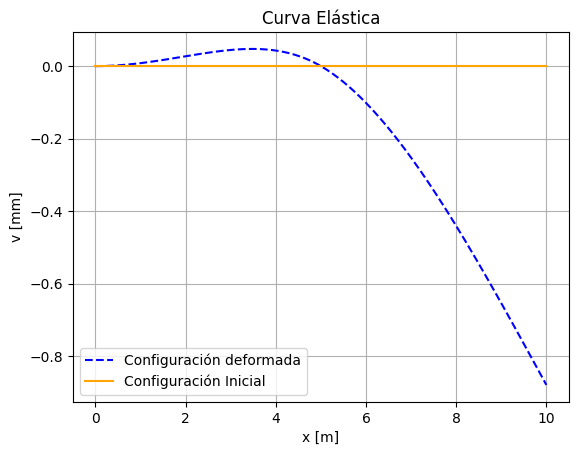

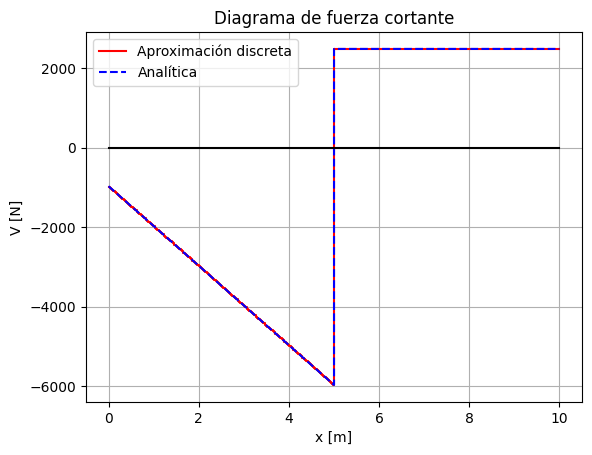

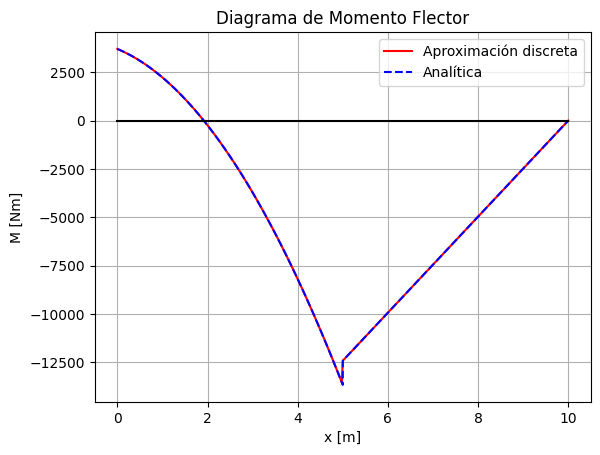

In [3]:
test.show_deformation()
test.show_shear_diagram(analytical=True)
test.show_moment_diagram(analytical=True)

## Pregunta 3

In [14]:
import numpy as np
from scipy.sparse.linalg import gmres
import matplotlib.pyplot as plt

def distributed_force(x):
  kind = 'C'
  f = np.ones(len(x))
  return 500*f, kind

class element_2D:
  def __init__(self,h,n,theta,E,A,I,forces,kind):

    #----------Numeración global del elemento----------#

    self.i_global = 2*n-1 # Nodo izquierdo
    self.j_global = 2*n   # Nodo derecho

    #----------Matriz de rigidez del elemento----------#

    K_00 = np.array(([A/h, 0, 0],[0, 12*I/(h**3), 6*I/(h**2)],[0, 6*I/(h**2), 4*I/h]))
    K_01 = np.array(([-A/h, 0, 0],[0, -12*I/(h**3), 6*I/(h**2)],[0, -6*I/(h**2), 2*I/h]))
    K_10 = np.array(([-A/h, 0, 0],[0, -12*I/(h**3), -6*I/(h**2)],[0, 6*I/(h**2), 2*I/h]))
    K_11 = np.array(([A/h, 0, 0],[0, 12*I/(h**3), -6*I/(h**2)],[0, -6*I/(h**2), 4*I/h]))
    self.K_element = np.block([[K_00,K_01],[K_10,K_11]])*E

    #----------Matriz de Orientación del elemento----------#

    T_00 = np.array(([np.cos(theta), np.sin(theta), 0],[-np.sin(theta), np.cos(theta), 0],[0, 0, 1]))
    T_11 = np.array(([np.cos(theta), np.sin(theta), 0],[-np.sin(theta), np.cos(theta), 0],[0, 0, 1]))
    self.T_element = np.block([[T_00, np.zeros((3,3))],[np.zeros((3,3)), T_11]])

    #----------Vector de carga distribuida del elemento----------#

    self.wi = forces[0]
    self.wj = forces[1]

    if kind=='C' and self.wi!=self.wj: # Trato de discontinuidad para distribución constante, evita cargas en elementos no cargados.
      min_q = min([abs(self.wi),abs(self.wj)])
      self.wi = min_q
      self.wj = min_q

    self.fw_element = np.zeros(6)
    self.fw_element[1] = h*(7*self.wi/20 + 3*self.wj/20)
    self.fw_element[2] = h**2 * (self.wi/20 + self.wj/30)
    self.fw_element[4] = h*(3*self.wi/20 + 7*self.wj/20)
    self.fw_element[5] = -h**2 * (self.wi/30 + self.wj/20)

class Marco:
  def __init__(self,N_b,L,N_e,theta,force):
    '''
    N_b = Número de vigas presentes en el sistema. (int)
    L = Longitudes de las vigas en ft. (Lista)
    N_e = Número de elementos por cada viga, debe tener la misma cantidad de elementos que L. (Lista)
    theta = Inclinación de cada viga, en radianes. (Lista)
    force = Carga distribuida sobre las vigas. (Función)
    '''
    if len(L)!=N_b:
      raise ValueError('No se indica la longitud de todas las vigas')
    if len(L)!=len(N_e):
      raise ValueError('No se indica el número de elementos de todas las vigas')
    #----------Constantes físicas----------#

    self.E = 30 * 10**6 * (12**2)# lbf/ft2
    self.A = 100 / (12**2) # ft2
    self.I = 200 / (12**4) # ft4

    #----------Discretización y determinación de nodos----------#

    self.lengths = np.zeros(len(L))
    self.n_e = np.sum(N_e) # Elementos totales del sistema
    self.n = np.sum(N_e)+1 # Nodos totales del sistema
    self.nodes = np.zeros(N_b, dtype=int) # Lista con el número de nodos por elemento
    self.h = np.zeros(N_b)
    self.x = {}
    for i in range(N_b):
      self.lengths[i] = L[i]
      self.nodes[i] = N_e[i]+1
      self.h[i] = self.lengths[i]/N_e[i]
      self.x[i] = np.linspace(0,self.lengths[i],self.nodes[i])

    #----------Determinar la carga distribuida en el espacio discretizado----------#

    self.q = {}
    self.q_kind = np.zeros(N_b, dtype=str)
    for i in range(N_b):
      if i==0:
        self.q[i], self.q_kind[i] = force(self.x[i])
      else:
        self.q[i] = np.zeros(len(self.x[i]))
        self.q_kind[i] = 'C'


    #----------Creación de los elementos----------#

    self.elements = {}
    self.K = np.zeros((3*self.n,3*self.n))
    self.fw = np.zeros(3*self.n)
    element_number = 0
    k = 0
    for j in range(N_b):
      for i in range(N_e[j]):
        element_number+= 1
        self.elements[element_number] = element_2D(self.h[j], element_number, theta[j], self.E, self.A, self.I, self.q[j][i:i+2], self.q_kind[j])
        dummy = np.zeros((3*self.n,3*self.n))
        dummy[3*k:3*k+6,3*k:3*k+6] = np.matmul(np.matmul(np.transpose(self.elements[element_number].T_element),self.elements[element_number].K_element),self.elements[element_number].T_element)
        self.K+=dummy # Ensamblaje matriz global de rigidez
        dummy_2 = np.zeros(3*self.n)
        dummy_2[3*k:3*k+6] = np.matmul(self.elements[element_number].T_element,self.elements[element_number].fw_element)
        self.fw+=dummy_2 # Ensamblaje vector global de trabajo
        k+=1 # Contador global

  def solve_system(self, external_conditions, boundary_conditions, solver='NumPy'):
    '''
    external_conditions = Diccionario de la forma i:[N, x, F, 'Fx']
                          donde i es un correlativo, N, es la viga
                          a la cual se aplica se aplica la condición,
                          x es la posición dentro de la viga,
                          F es la magnitud de la fuerza o momento y
                          'F' indica si es fuerza (y su dirección) o momento.
    boundary_conditions = Diccionario de la forma i:[N, x,'A']
                          donde i es un correlativo, N es la viga
                          a la cual se le aplica la condición,
                          x es la posición de la condición,
                          si no coincide exactamente con un nodo
                          devuelve un error. 'A' es el tipo
                          de condición, 'A' para apoyo, 'P' para patín y
                          'F' para fijo o empotramiento.
                          Las condiciones deben estar ordenadas por distancia.
    '''
    #----------Creación de vector de fuerzas externas----------#

    ndof = len(self.fw) # Grados de libertad del sistema general (completo)
    self.ec = external_conditions
    self.external_forces = np.zeros(ndof)

    for i in external_conditions:
      beam, position, magnitude, kind = external_conditions[i]
      relative_node = int(np.round(position/self.h[beam],0))
      relative_node+= np.sum(self.nodes[:beam]) - 1*beam # Elimina nodos repetidos, compartidos entre vigas
      if (position%self.h[beam] > 1e-9) and (abs(position%self.h[beam] - self.h[beam]) > 1e-9):
        print(f"La fuerza o momento externo {i} se encuentra fuera de un nodo, se aproximara al nodo {relative_node}.")
      if kind=='Fx':
        dof = 3 * relative_node
      elif kind=='Fy':
        dof = 3 * relative_node + 1
      elif kind=='M':
        dof = 3 * relative_node + 2
      else:
        raise ValueError(f'No se reconoce el tipo de condición de borde: {kind}')
      self.external_forces[dof]+= magnitude
    self.forces_vector = self.fw + self.external_forces # Vector de fuerzas completo (carga distribuida y fuerzas externas).

    self.K_particular = np.copy(self.K)
    self.forces_particular = np.copy(self.forces_vector)

    #----------Aplicación de condiciones de borde----------#

    self.bc = boundary_conditions
    self.K_particular = np.copy(self.K) # Matriz reducida (particular), al aplicar las condiciones de borde.
    self.forces_particular = np.copy(self.forces_vector) # Vector reducido al aplicar las condiciones de borde

    eliminated_rows = []
    for i in boundary_conditions:
      beam, position, kind = boundary_conditions[i]
      if (position%self.h[beam] > 1e-9) and (abs(position%self.h[beam] - self.h[beam]) > 1e-9):
        raise ValueError(f"La condición de borde {i} no se encuentra en un nodo, considera una cantidad distinta de elementos")
      relative_node = int(np.round(position/self.h[beam],0))
      relative_node+= np.sum(self.nodes[:beam]) - 1*beam # Elimina nodos repetidos, compartidos entre vigas
      if kind=='A':
        eliminated_rows.append(3*relative_node)
        eliminated_rows.append(3*relative_node + 1)
      elif kind=='Px':
        eliminated_rows.append(3*relative_node + 1)
      elif kind=='Py':
        eliminated_rows.append(3*relative_node)
      elif kind=='F':
        eliminated_rows.append(3*relative_node)
        eliminated_rows.append(3*relative_node + 1)
        eliminated_rows.append(3*relative_node + 2)
      elif kind=='P':
        raise ValueError('Indicar eje del patín, usar Px para patín horizontal y Py para patín vertical')
      else:
        raise ValueError(f'No se reconoce la condición de contorno {kind}, utilice F para empotramiento, A para apoyo y Px o Py para patín')

    eliminated_rows = sorted(set(eliminated_rows))

    dummy = np.ones(ndof, dtype=bool) # Vector de Trues
    dummy[eliminated_rows] = False # Las posiciones a eliminar toman el valor False

    self.K_particular = self.K[np.ix_(dummy, dummy)]
    self.forces_particular = self.forces_vector[dummy] # Se extraen solo las posiciones no eliminadas de cada arreglo

    #----------Resolución de Sistema Lineal----------#

    self.solution_vector = np.zeros(len(self.forces_particular))
    if solver=='GMRES':
      self.solution_vector, info= gmres(self.K_particular, self.forces_particular, maxiter=5000, restart=200, rtol=1e-5)
      if info>0:
        print('GMRES no alcanzo la convergencia, revisar el número de elementos')
    elif solver=='NumPy':
      self.solution_vector = np.linalg.solve(self.K_particular, self.forces_particular)

    else:
      raise ValueError(f'No se reconoce el solver {solver}.')

    #----------Reconstrucción solución completa----------#

    temp = np.zeros(ndof)
    dummy = np.ones(ndof, dtype=bool)
    dummy[eliminated_rows] = False
    temp[dummy] = self.solution_vector
    self.solution_vector = temp

    self.displacements_u = self.solution_vector[::3]
    self.displacements_v = self.solution_vector[1::3]
    self.angles = self.solution_vector[2::3]

    #----------Cálculo de reacciones----------#

    self.reactions = np.matmul(self.K,self.solution_vector)-self.forces_vector
    self.reactions_forces_x = self.reactions[::3]
    self.reactions_forces_y = self.reactions[1::3]
    self.reactions_moments = self.reactions[2::3]

  def show_deformation(self,factor=1):

    fig, ax = plt.subplots()
    #----------Gráfico de configuración inicial----------#
    ax.plot(np.array([0,0]), np.array([0,16]), linestyle="-", color='blue')
    ax.plot(np.array([0,20]), np.array([16,16]), linestyle="-", color='blue')
    ax.plot(np.array([20,20]), np.array([0,16]), label='Configuración Inicial', linestyle="-", color='blue')
    #----------Gráfico de configuración deformada----------#
    #----------Deformación tramo 1----------#
    dof1 = self.nodes[0]
    x1 = np.zeros(dof1) + self.displacements_u[:dof1]*factor
    y1 = np.linspace(0,self.lengths[0],dof1) + self.displacements_v[:dof1]*factor
    ax.plot(x1, y1, linestyle='--', color='red')
    #----------Deformación tramo 2----------#
    dof2 = self.nodes[1]
    x2 = np.linspace(0,self.lengths[1],dof2) + self.displacements_u[dof1-1:dof1+dof2-1]*factor
    y2 = np.ones(dof2)*self.lengths[0] + self.displacements_v[dof1-1:dof1+dof2-1]*factor
    ax.plot(x2, y2, linestyle='--', color='red')
    #----------Deformación tramo 3----------#
    dof3 = self.nodes[2]
    x3 = np.ones(dof3)*self.lengths[1] + np.flip(self.displacements_u[dof1+dof2-2:])*factor
    y3 = np.linspace(0,self.lengths[2],dof3) + self.displacements_v[dof1+dof2-2:]*factor
    ax.plot(x3, y3, label='Configuración deformada', linestyle='--', color='red')
    ax.set_xlabel('x [ft]')
    ax.set_ylabel('y [ft]')
    ax.set_title('Deformación')
    plt.grid(True)
    ax.legend()

  def check_equilibrium(self):
    calculated_y = np.sum(self.reactions_forces_y)
    calculated_x = np.sum(self.reactions_forces_x)
    external_x = 0
    external_y = 0
    for i in self.ec:
      _, _, magnitude, kind = self.ec[i]
      if kind=='Fy':
        external_y+=magnitude
      if kind=='Fx':
        external_x+=magnitude
    external_x+=self.q[0][0]*16 # Carga distribuida
    print(f'Total Reacciones verticales calculadas: {calculated_y} [lbf]')
    print(f'Magnitud fuerzas externas verticales: {external_y} [lbf]')
    print(f'Diferencial = {abs(calculated_y) - abs(external_y)}')
    print()
    print(f'Total Reacciones horizontales calculadas: {calculated_x} [lbf]')
    print(f'Magnitud fuerzas externas horizontales: {external_x} [lbf]')
    print(f'Diferencial = {abs(calculated_x) - abs(external_x)}')
    print()
    calculated = np.sum(self.reactions_moments)
    external = 0
    external+= -10000*(self.lengths[1]-8)
    external+= self.reactions_forces_y[0]*self.lengths[1]
    external+= 500*16*self.lengths[0]/2
    print(f'Momento en el empotramiento: {calculated} [lbf ft]')
    print(f'Momento debido a las fuerzas: {external} [lbf ft]')
    print(f'Diferencial = {abs(calculated) - abs(external)}')


In [19]:
marco = Marco(3, [16, 20, 16], [64, 80, 64], (np.pi/2, 0, -np.pi/2), distributed_force)
external_forces = {}
external_forces[1] = [1, 8, -10000, 'Fy']
boundary_conditions = {}
boundary_conditions[1] = [0, 0,'Px']
boundary_conditions[2] = [2, 16, 'F']
marco.solve_system(external_forces, boundary_conditions)

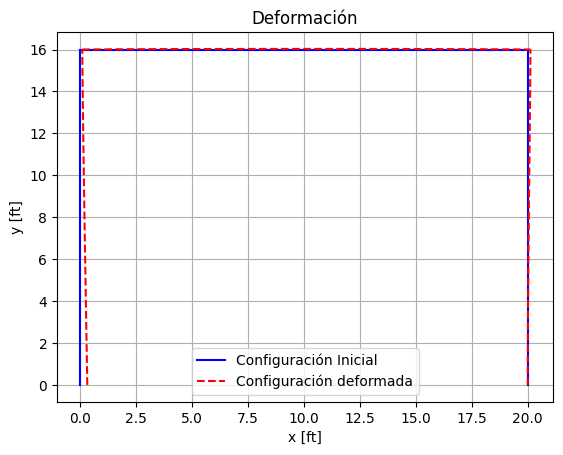

In [20]:
marco.show_deformation(factor=1)